In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from google.colab import drive

In [21]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
file_path = '/content/drive/MyDrive/Sem VIII Practical/LPV/DL/Datasets/BostonHousing.csv'
df = pd.read_csv(file_path)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
print(df.isnull().sum())
print(np.isinf(df).sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [24]:
df = df.dropna()
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [25]:
# Split the data into features (X) and target (y)
X = df.drop('medv', axis=1)  # Assuming 'MEDV' is the target column
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer=Adam(learning_rate=0.001, clipvalue=1.0), loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 567.1703 - val_loss: 574.6549
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 595.1752 - val_loss: 561.6133
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 580.8300 - val_loss: 548.1796
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 539.8445 - val_loss: 534.4418
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 566.1598 - val_loss: 520.2336
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 520.5952 - val_loss: 505.8050
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 532.2681 - val_loss: 490.8893
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 529.9300 - val_loss: 475.5431
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 481.6998 - val_loss: 459.8078
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 445.6457 - val_loss: 443.9257
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 478.3658 - val_loss: 427.4765
Epoch 12/100
10/10 ━━━━━━━━━━

In [27]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2948 
Test Loss: 20.1207275390625


In [28]:
y_pred = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


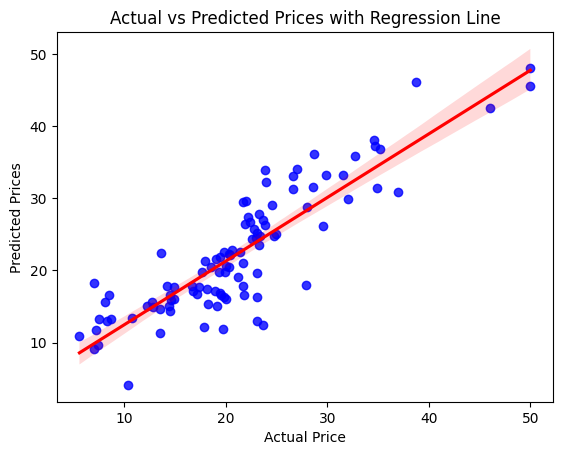

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a scatter plot with a regression line
sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices with Regression Line')
plt.show()

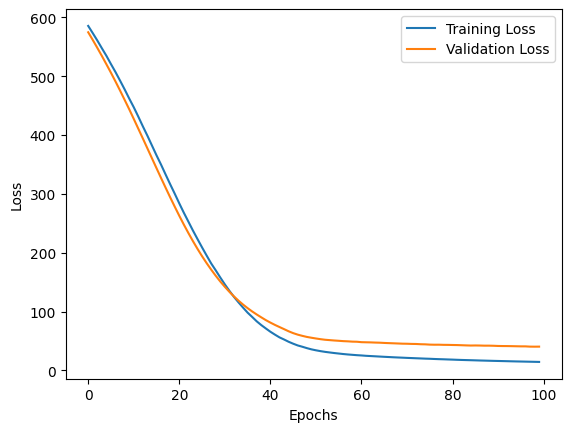

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()